# Load the Dataset

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings

# Define colors
primary = "#000000"
secondary = "#800000"

# Set theme and color palette for Netflix analysis
sns.set_theme(style="whitegrid")  # Set white grid theme
#palette = ["#E50914", "#221F1F"]  # Netflix red and black color codes
sns.set_palette([primary, secondary])
# Apply the color palette
#sns.set_palette(sns.color_palette(palette))

# Set figure size for all plots
plt.rcParams["figure.figsize"] = (8, 6)

# Load the Netflix dataset
data = pd.read_csv("C:\\Users\\HP\\OESON_Learning\\netflix.csv")  

# View the first few rows of the dataset
print(data.head())

# Check dataset structure
print(data.info())

# Show dataset shape (rows, columns)
print("Dataset Shape:", data.shape)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Visualizing Missing Values


Bar chart of Missing Values

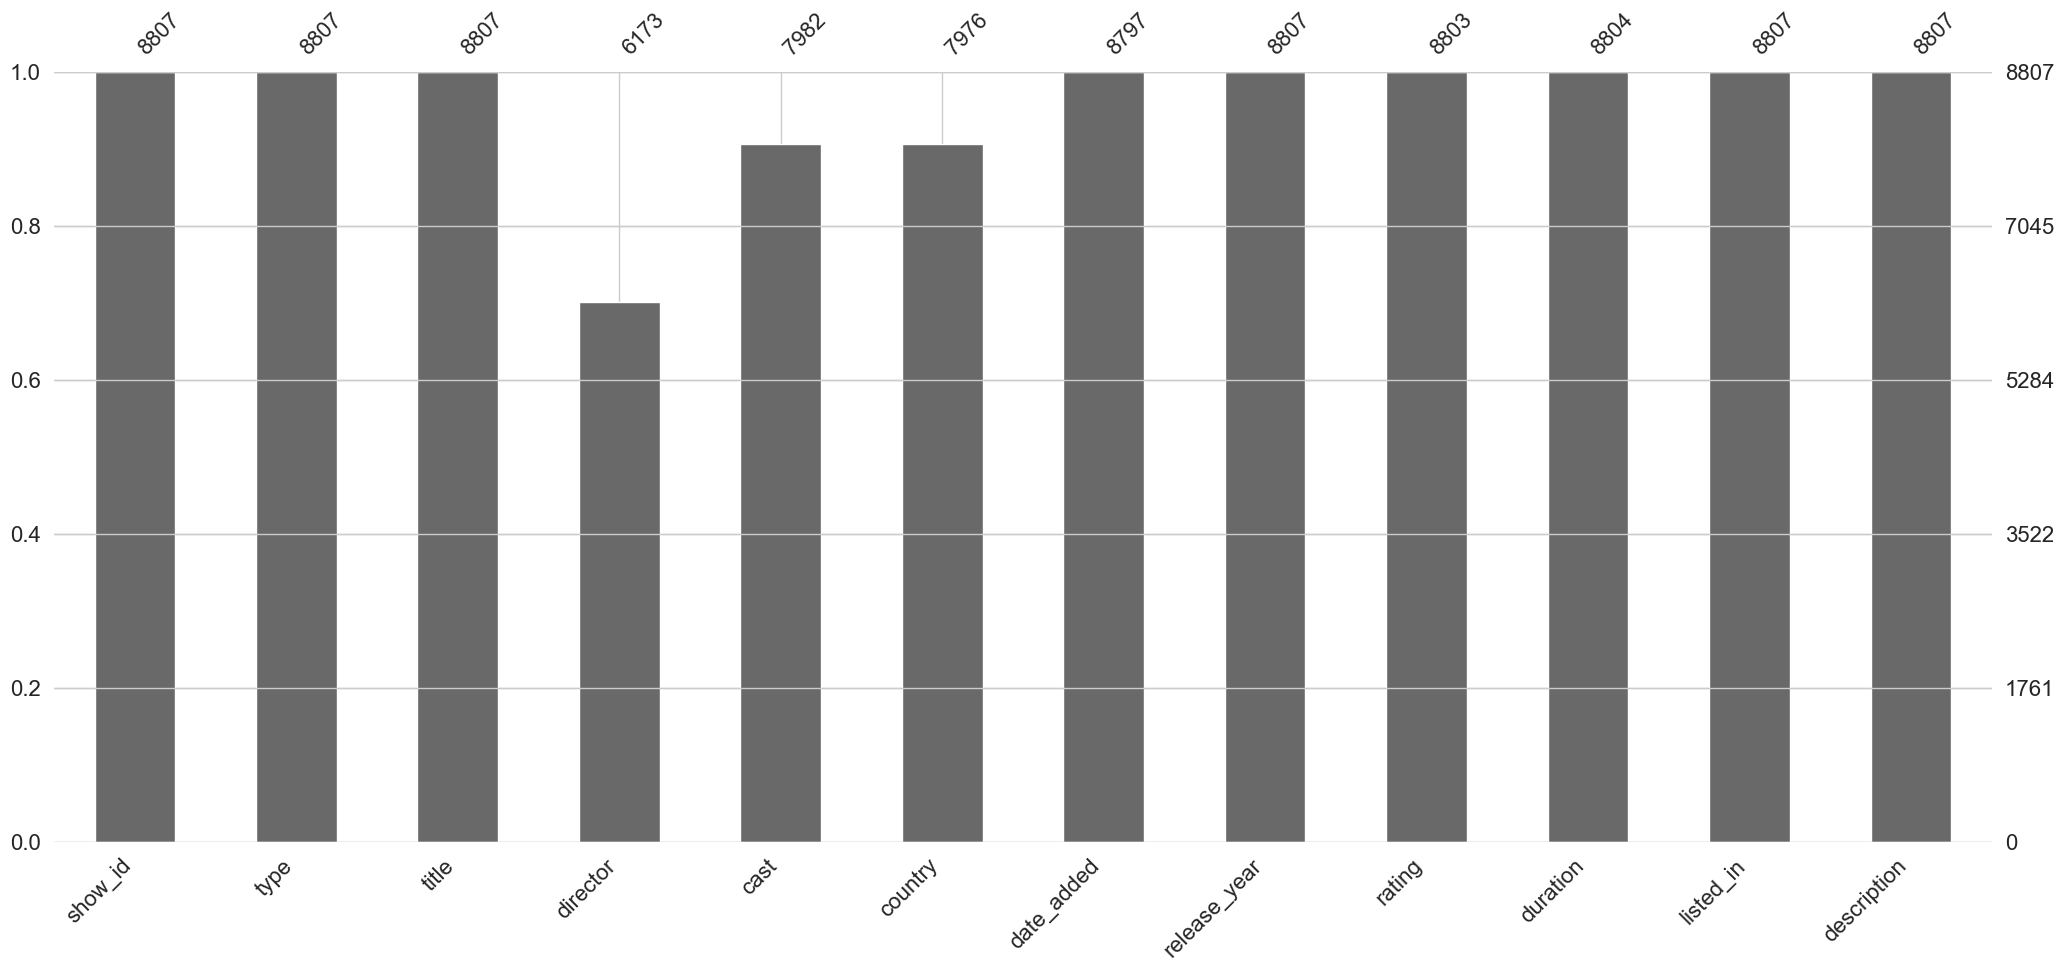

In [29]:
import missingno as msno

# Bar plot of missing values
msno.bar(data)
plt.show()




Matrix plot of Missing Values

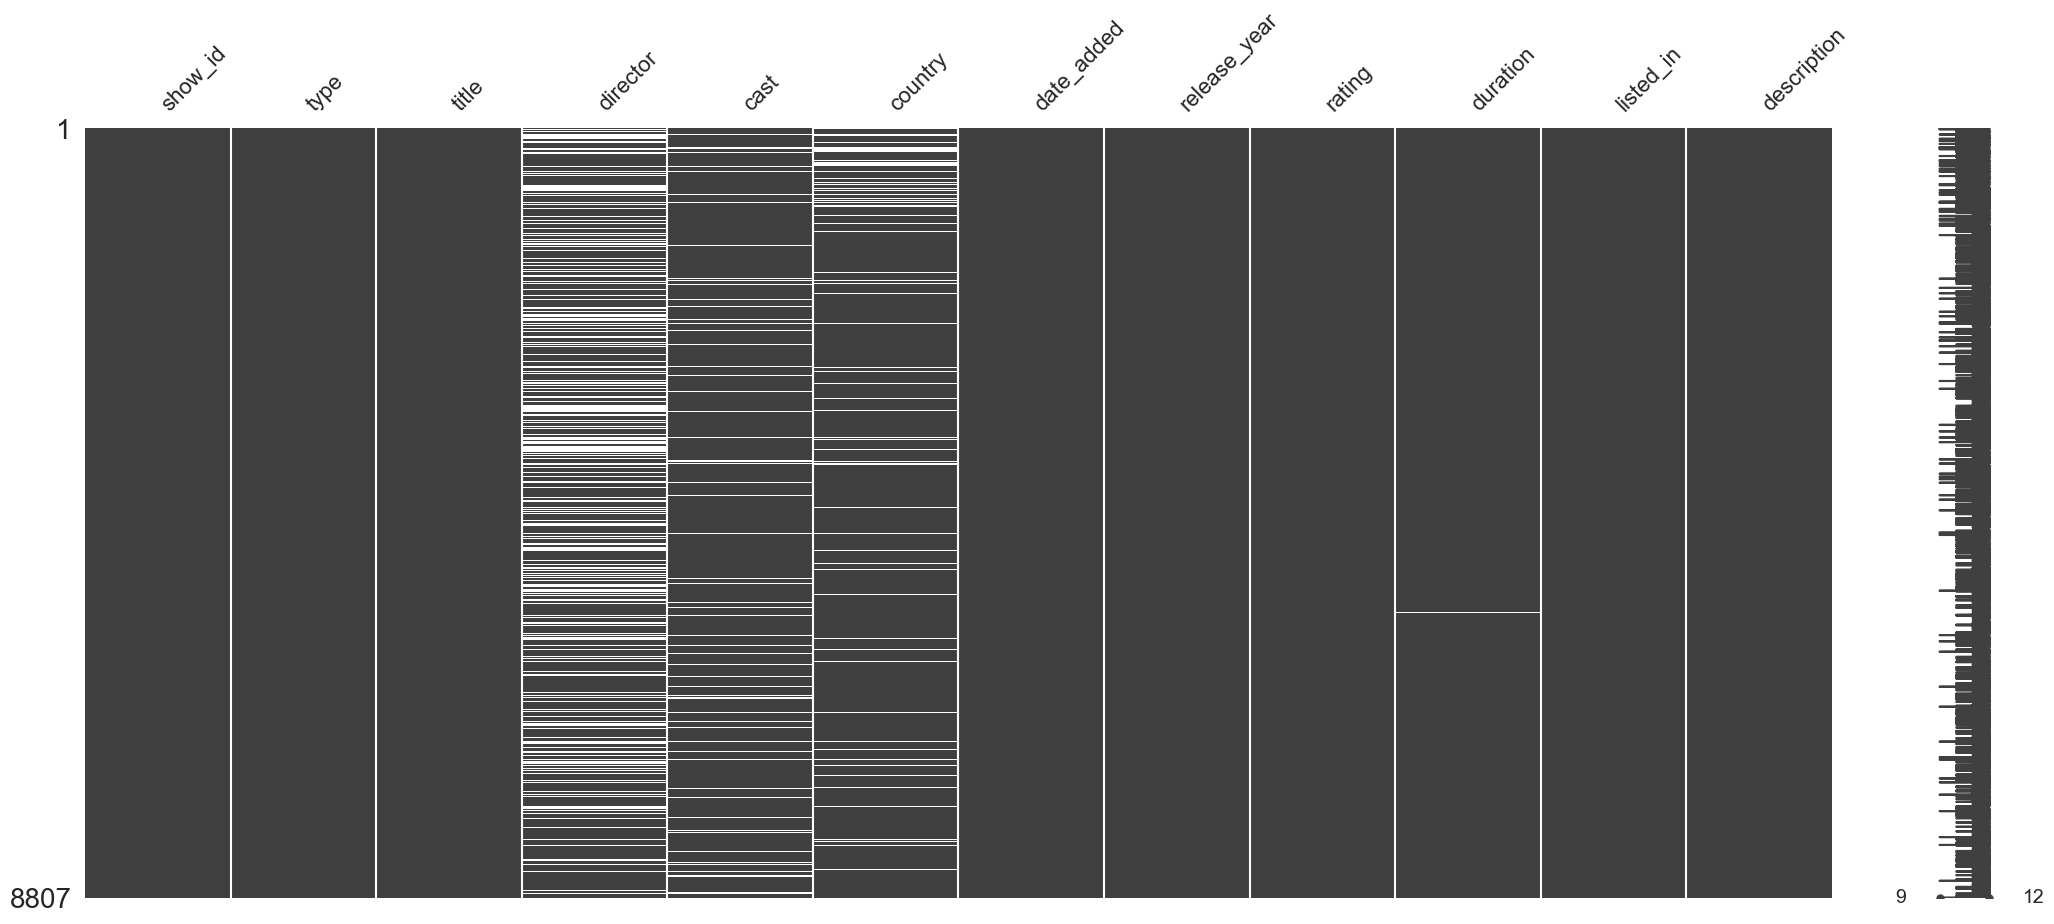

In [30]:
msno.matrix(data)
plt.show()

Dendrogram for Missing Data Relationships

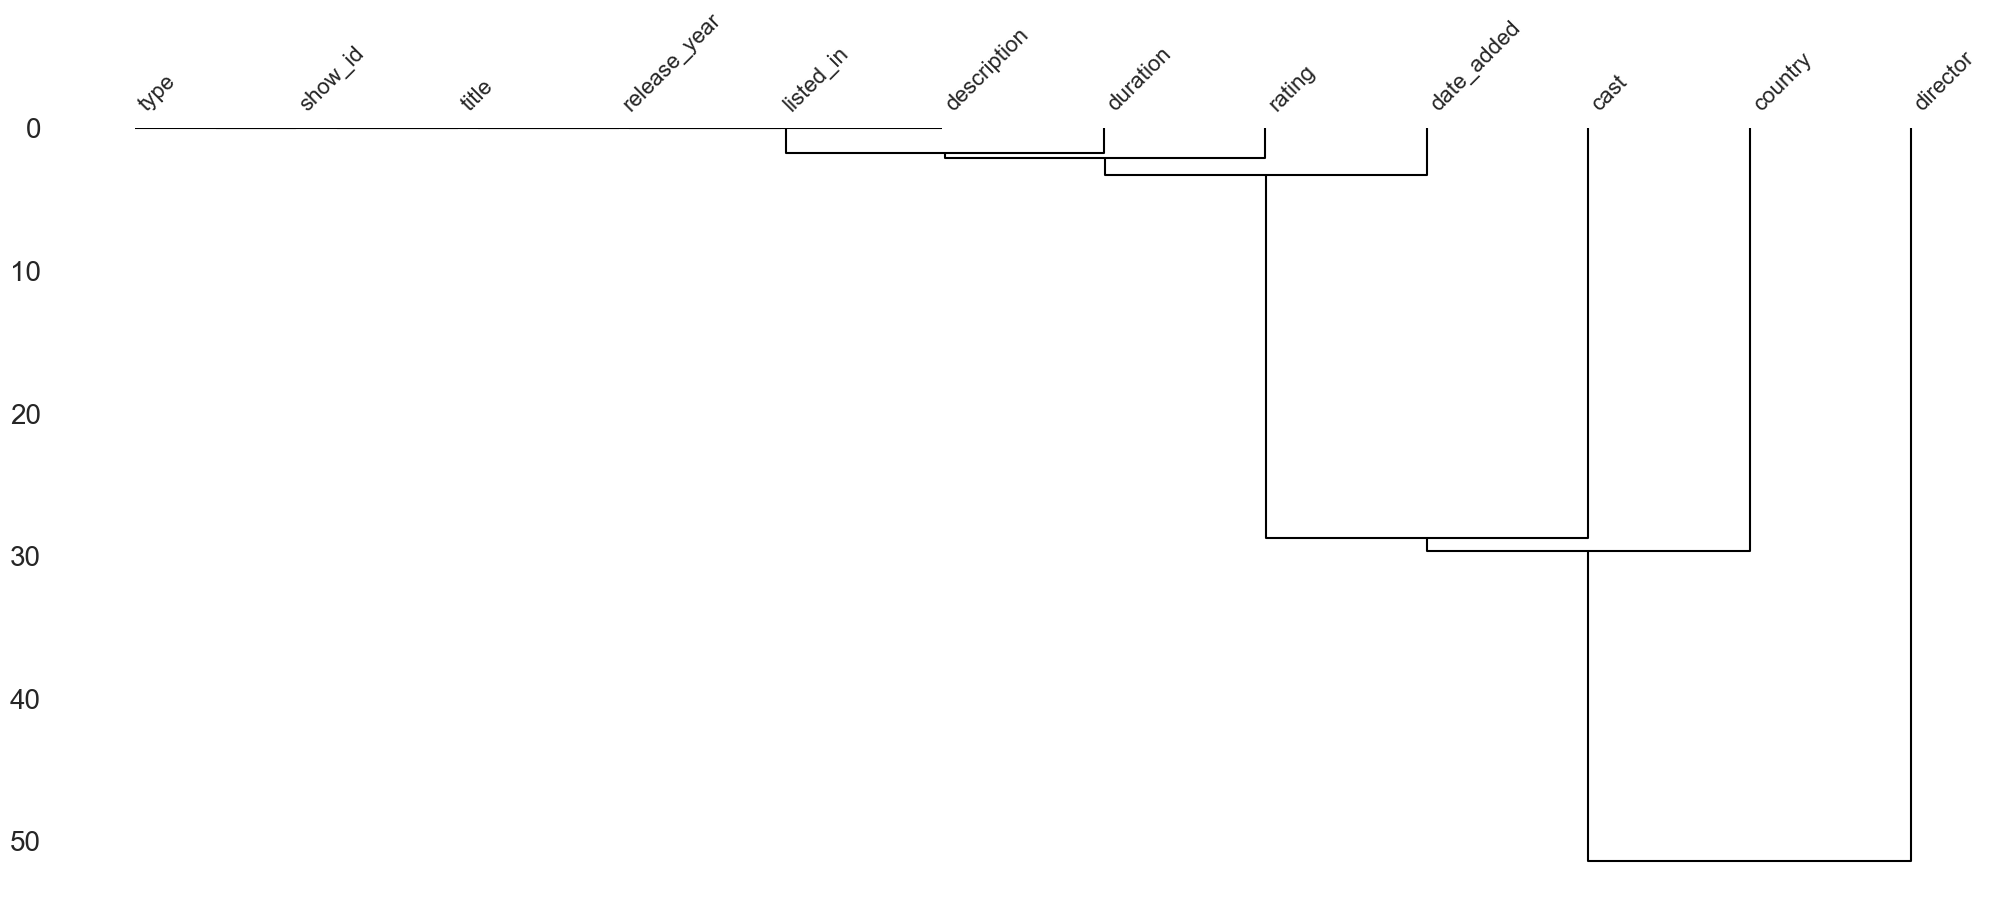

In [31]:
msno.dendrogram(data)
plt.show()

Heatmap of Missing Data


<Axes: >

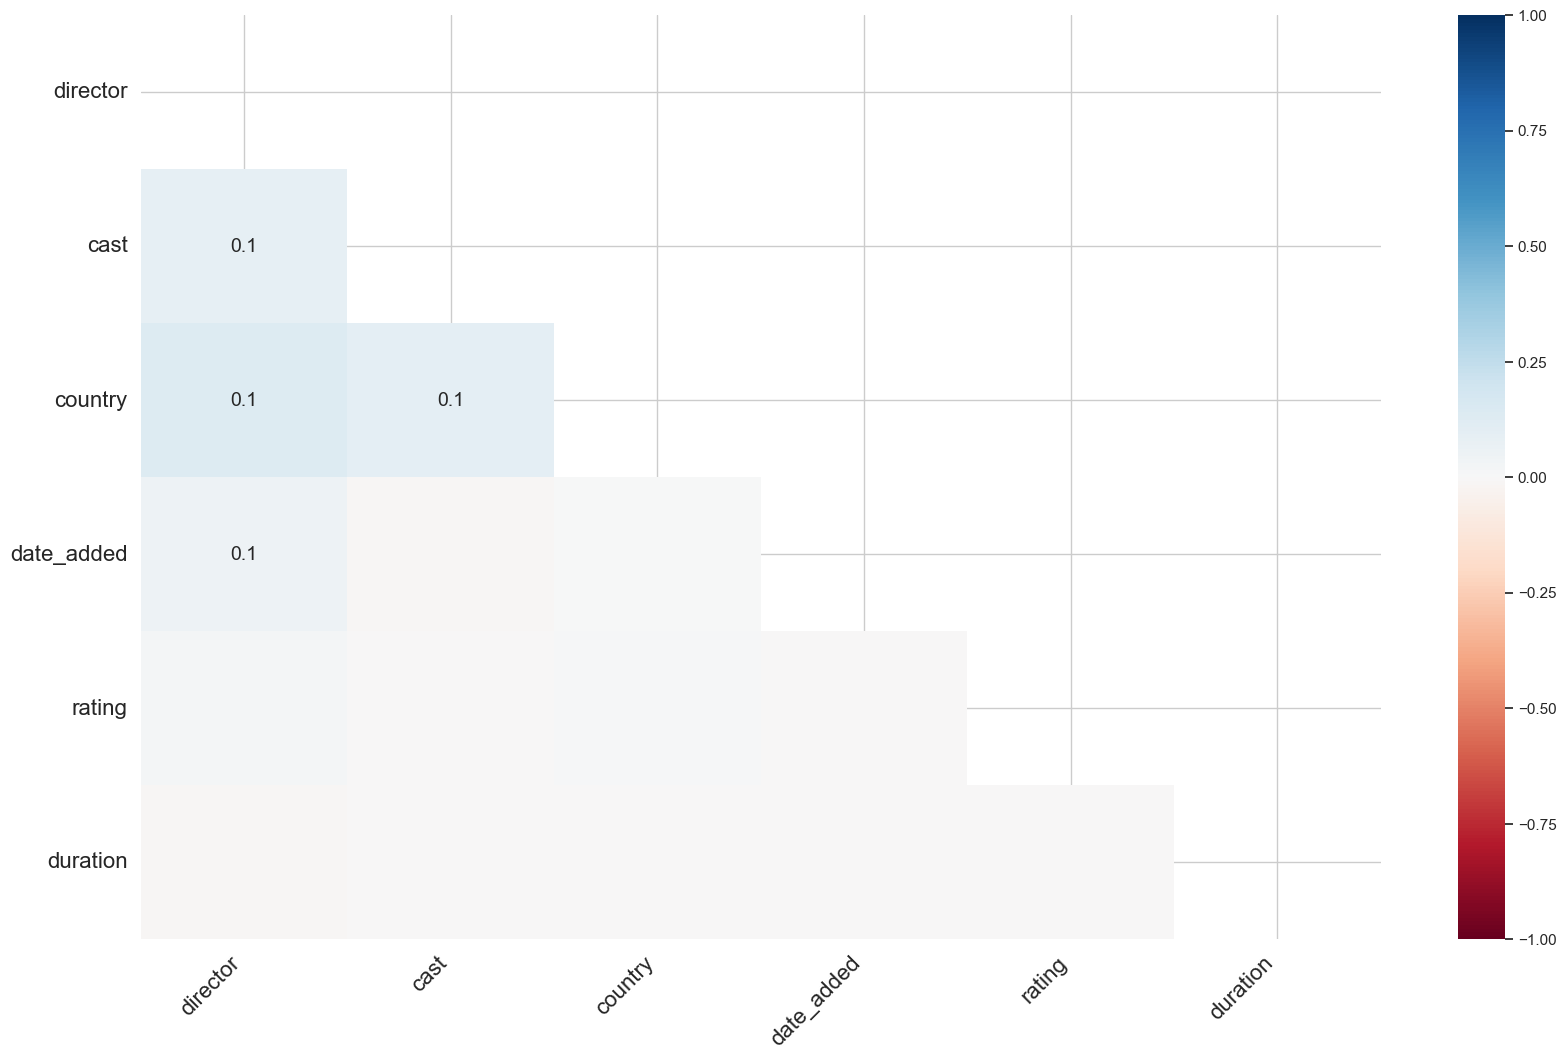

In [32]:
msno.heatmap(data)

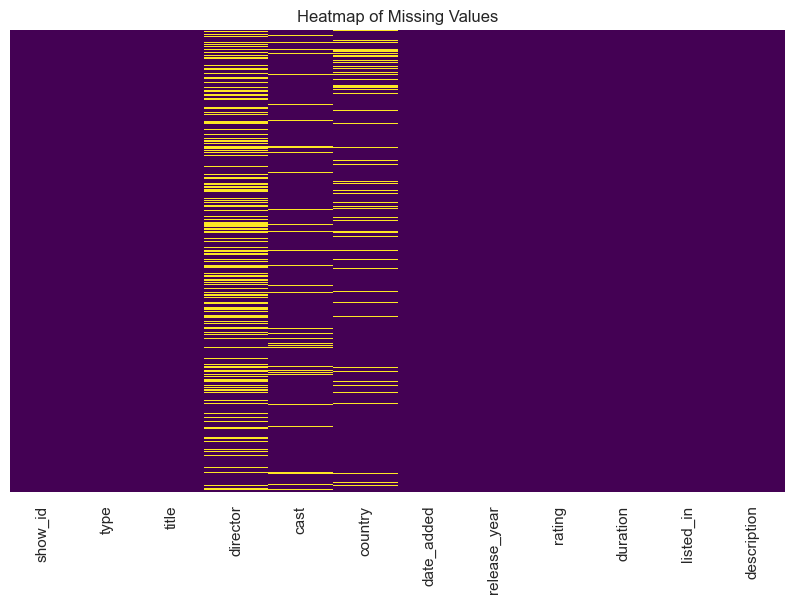

In [33]:
import seaborn as sns

# Create heatmap for missing data
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


# Handlling Missing Values

In [34]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# Univariate: Categorical Columns

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2398939043.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=c, order=data[c].value_counts().index, palette=palettes)
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2398939043.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=data, x=c, order=data[c].value_counts().index, palette=palettes)


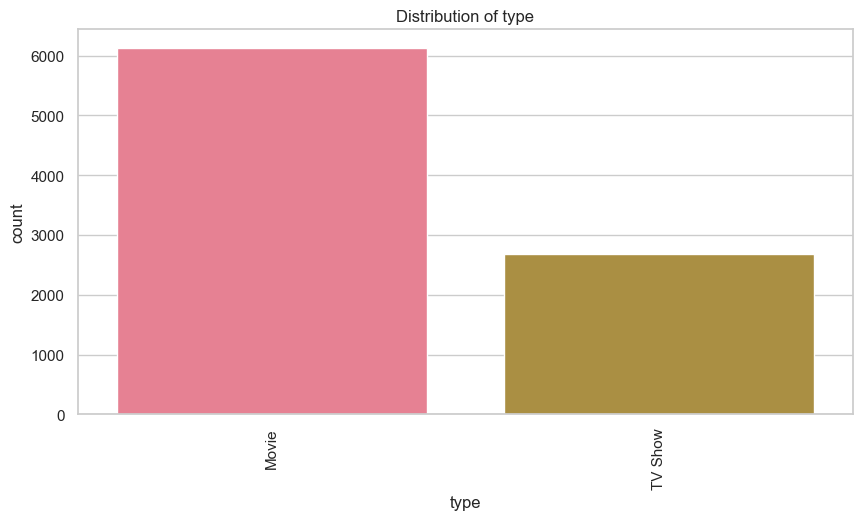

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2398939043.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=c, order=data[c].value_counts().index, palette=palettes)
C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2398939043.py:10: UserWarning: 
The palette list has fewer values (6) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=c, order=data[c].value_counts().index, palette=palettes)


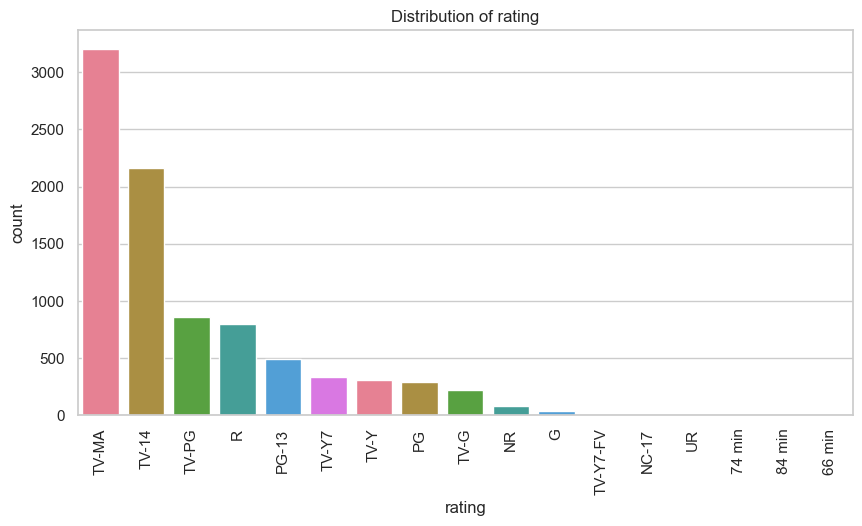

In [35]:

# Define categorical columns
cat = ['type', 'rating']

# Define color palette
palettes = sns.color_palette("husl")  # Corrected function name

# Loop through categorical columns and plot
for c in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=c, order=data[c].value_counts().index, palette=palettes)
    plt.title(f"Distribution of {c}")
    plt.xticks(rotation=90)
    plt.show()


# Distribution of Durations

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\2513220431.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration'].fillna(data['duration'].mode()[0], inplace=True)


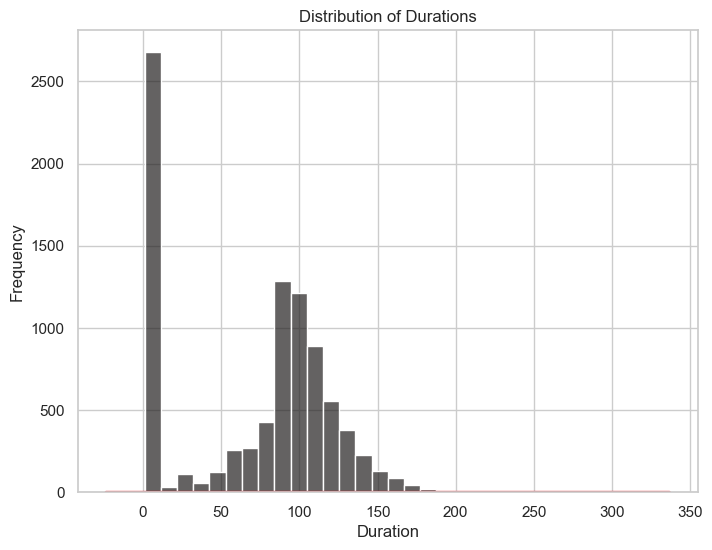

In [36]:

# Clean the data
data['duration'] = data['duration'].astype(str)

# Replace text to keep only numeric values
data['duration'] = data['duration'].str.replace(' min', '', regex=False)
data['duration'] = data['duration'].str.replace(' Seasons', '', regex=False)
data['duration'] = data['duration'].str.replace(' Season', '', regex=False)



# Define Colors
primary_color = "#E50914"  # Red for KDE
secondary_color = "#221F1F"  # Black for Histogram




# Convert to numeric type, handling errors
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Fill missing values with mode
data['duration'].fillna(data['duration'].mode()[0], inplace=True)

# Histogram Plot
sns.histplot(data['duration'], bins=30, kde=False, color=secondary_color, alpha=0.7, label="Histogram")

# KDE Plot
sns.kdeplot(data['duration'], color=primary_color, linewidth=2, label="KDE")
plt.title('Distribution of Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


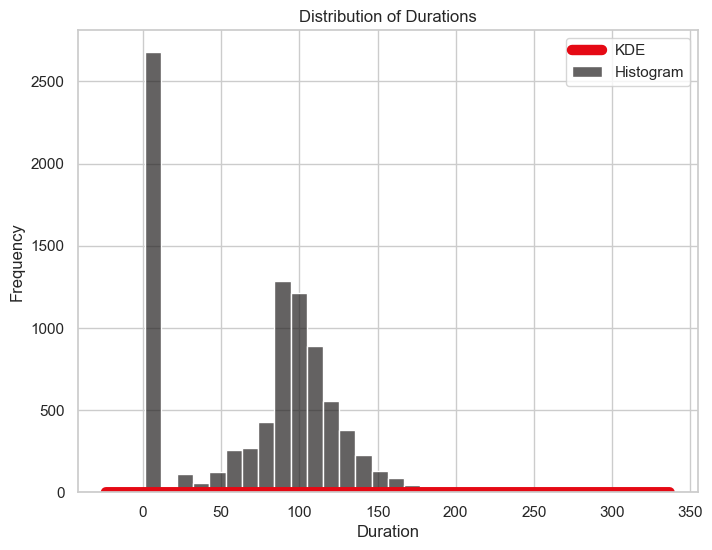

In [37]:
# Define Colors
primary_color = "#E50914"  # Red for KDE
secondary_color = "#221F1F"  # Black for Histogram

# Histogram Plot
sns.histplot(data['duration'], bins=30, kde=False, color=secondary_color, alpha=0.7, label="Histogram")

# KDE Plot with Improved Visibility
sns.kdeplot(data['duration'], color=primary_color, linewidth=7.5, label="KDE")  # Increase linewidth

# Add Titles and Labels
plt.title("Distribution of Durations")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.legend()
plt.show()



# Content by top 10 country

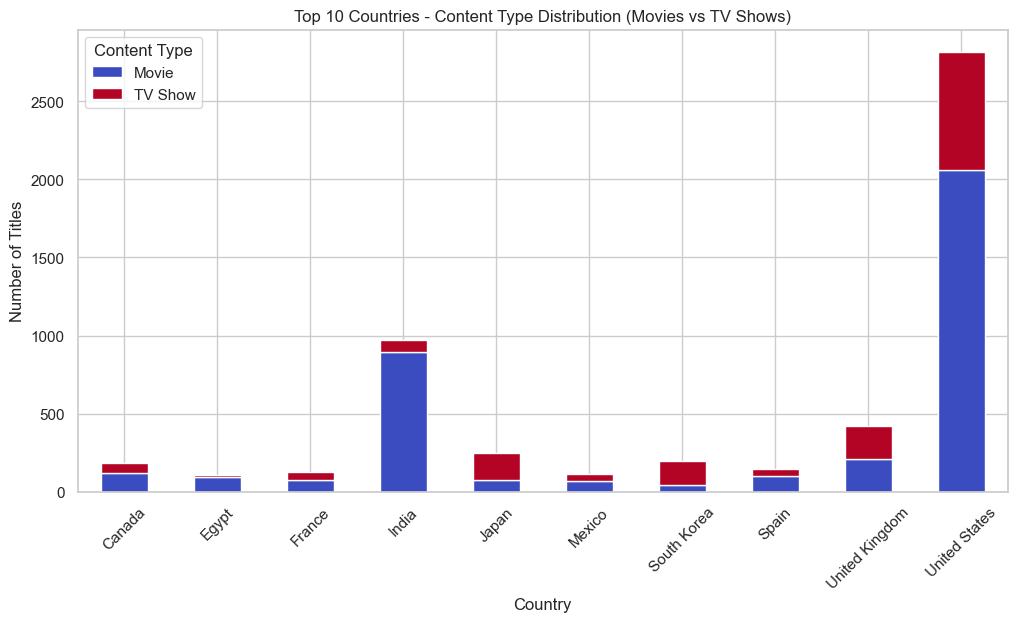

In [38]:
# Extract the top 10 countries with the most content
top_10_countries = data['country'].value_counts().head(10)

# Filter data for only these top 10 countries
top_country_filter = data[data['country'].isin(top_10_countries.index)]

# Group by country and type (Movie/TV Show) and count occurrences
ct = top_country_filter.groupby(['country', 'type']).size().reset_index(name='count')

# Create a pivot table for stacked bar representation
ct_pivot = ct.pivot(index='country', columns='type', values='count')

# **Fix: Fill NaN values with 0 (ensures numeric data)**
ct_pivot = ct_pivot.fillna(0)

# Define figure size
fig, ax = plt.subplots(figsize=(12, 6))

# **Fix: Use 'stacked=True' properly and remove undefined 'palettes' variable**
ct_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Add titles and labels
plt.title('Top 10 Countries - Content Type Distribution (Movies vs TV Shows)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')

# Show plot
plt.show()


# Content Added Over Months:



Line Plot

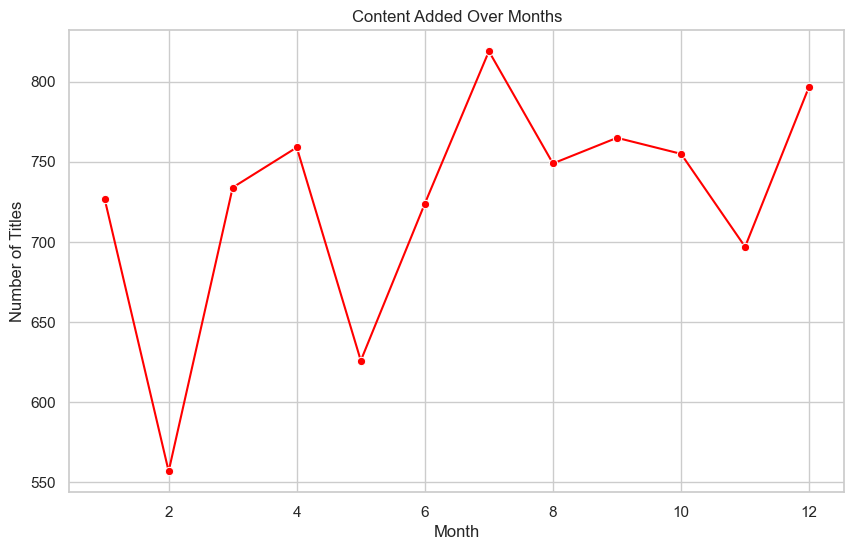

In [39]:
# Convert date_added to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract the month from 'date_added'
data['month_added'] = data['date_added'].dt.month

# Count the number of titles added each month
content_by_month = data['month_added'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=content_by_month.index, y=content_by_month.values, marker='o', color='red')
plt.title('Content Added Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


Bar Chart

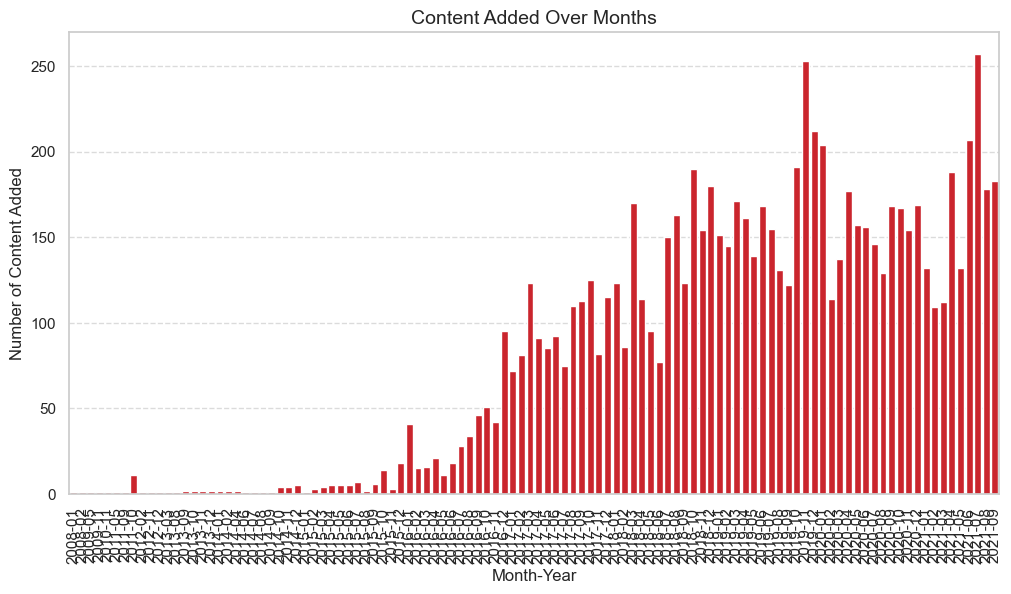

In [40]:
# Convert 'date_added' column to datetime format
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract Year and Month
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month

# Create a Month-Year column for grouping
data['month_year'] = data['date_added'].dt.to_period('M')

# Count the number of content added per month
content_by_month = data.groupby('month_year').size().reset_index(name='count')

# Convert period to string for plotting
content_by_month['month_year'] = content_by_month['month_year'].astype(str)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='month_year', y='count', data=content_by_month, color="#E50914")

# Format the plot
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title("Content Added Over Months", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Content Added", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Rating Popularity by Country


stacked bar chart

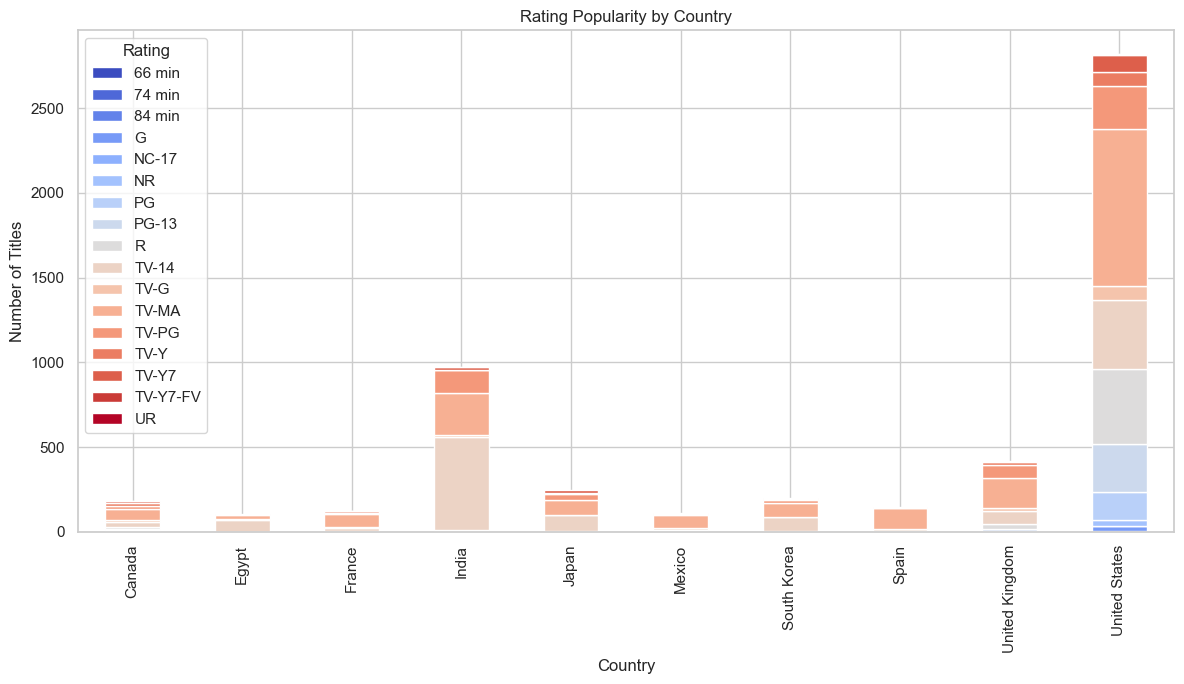

In [41]:
# Get the top 10 countries by content volume
top_countries = data['country'].value_counts().head(10).index

# Filter the data for the top countries
top_country_data = data[data['country'].isin(top_countries)]

# Group by 'country' and 'rating' and count the number of titles
rating_by_country = top_country_data.groupby(['country', 'rating']).size().reset_index(name='count')

# Pivot the data for visualization
rating_pivot = rating_by_country.pivot(index='country', columns='rating', values='count').fillna(0)

# Plot the stacked bar chart
rating_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
plt.title('Rating Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


Grouped bar

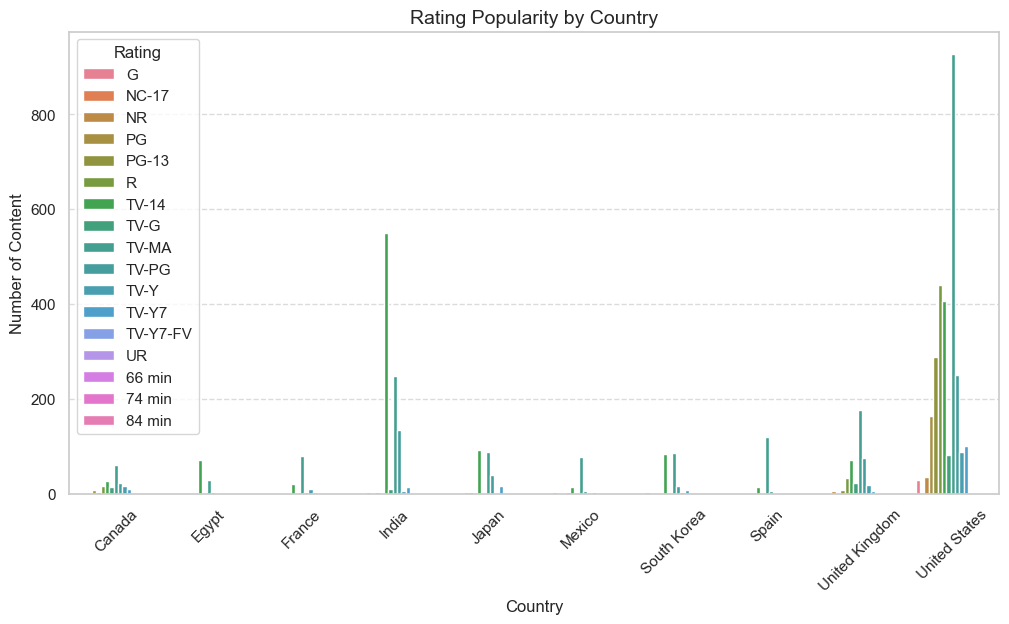

In [42]:
# Drop rows with missing values in 'country' and 'rating'
data = data.dropna(subset=['country', 'rating'])

# Extract top 10 countries with most content
top_countries = data['country'].value_counts().head(10).index

# Filter dataset to include only top 10 countries
filtered_data = data[data['country'].isin(top_countries)]

# Group by country and rating, then count occurrences
rating_by_country = filtered_data.groupby(['country', 'rating']).size().reset_index(name='count')

# Create grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='count', hue='rating', data=rating_by_country)

# Formatting the plot
plt.title("Rating Popularity by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Content", fontsize=12)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title="Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Content Distribution by Country (Stacked Bar Chart)


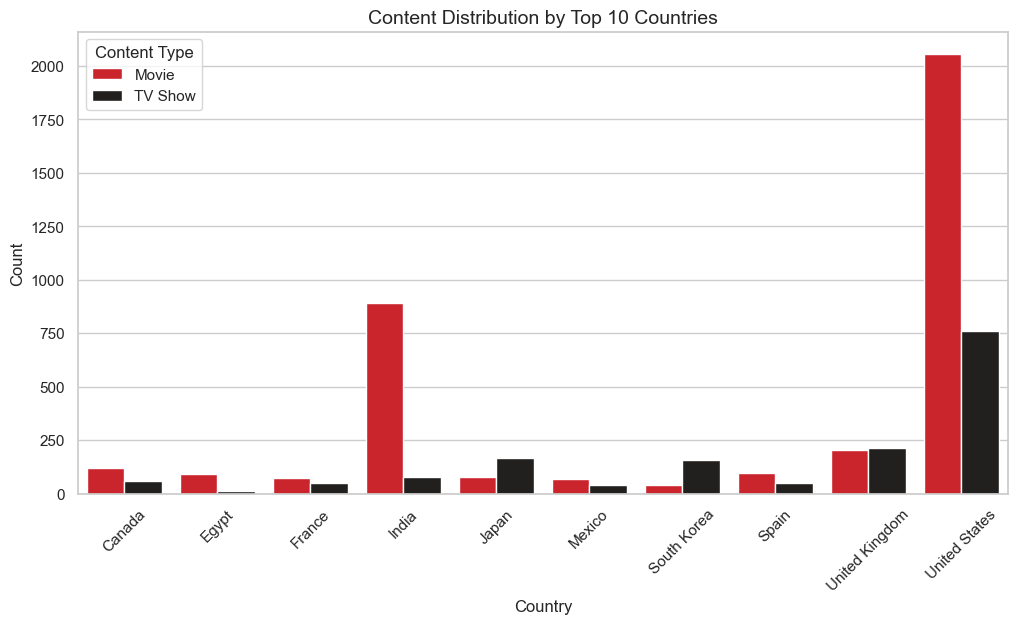

In [43]:
#Extract Top 10 Countries

top_countries = data['country'].value_counts().head(10).index

# Filter Data for Top 10 Countries
top_country_data = data[data['country'].isin(top_countries)]
# Group Data by Country and Content Type (Movies/TV Shows)

country_group = top_country_data.groupby(['country', 'type']).size().reset_index(name='count')

#Generate the Stacked Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='type', data=country_group, palette=['#E50914', '#221F1F'])

plt.title("Content Distribution by Top 10 Countries", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()




# Content Added Over Time (Bar Chart)

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\1750802699.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_content.index, y=yearly_content.values, palette="Reds")


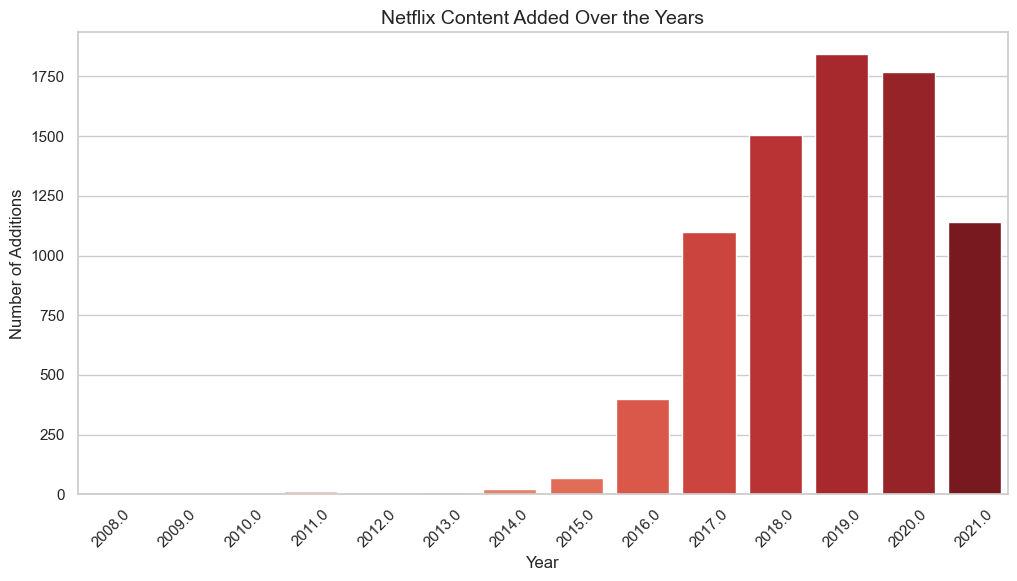

In [44]:
#Extract Year from Date Added Column
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added'] = data['date_added'].dt.year

#Count Content Added Per Year
yearly_content = data['year_added'].value_counts().sort_index()

#Generate Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_content.index, y=yearly_content.values, palette="Reds")

plt.title("Netflix Content Added Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Additions", fontsize=12)
plt.xticks(rotation=45)
plt.show()



# Creating the Bar Chart for Monthly Content Additions

C:\Users\HP\AppData\Local\Temp\ipykernel_23136\3846079363.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Reds")


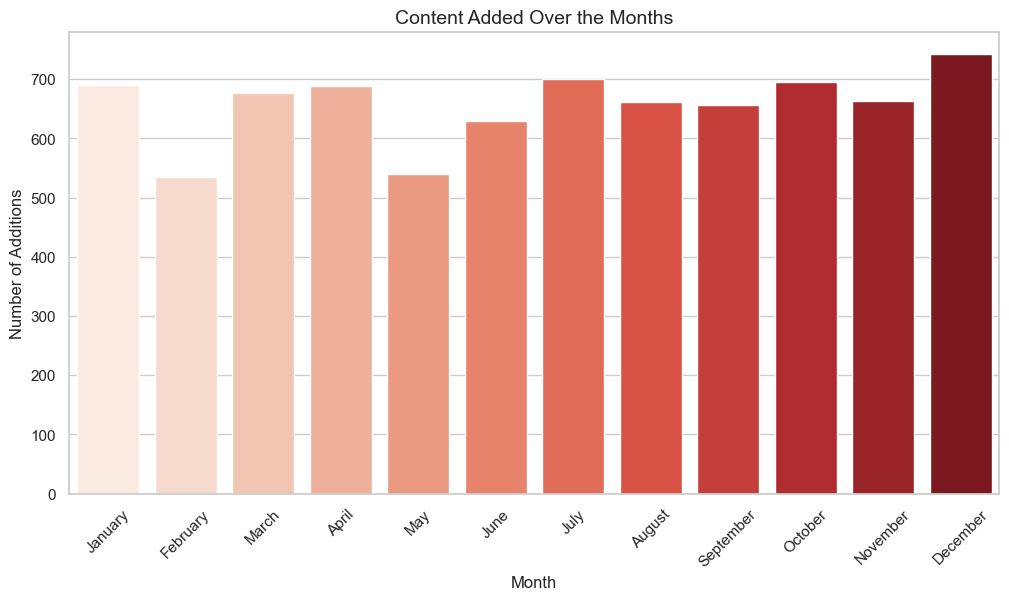

In [45]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with your dataset)
# data = pd.read_csv("your_file.csv") 

# Convert 'date_added' to datetime format, handling errors
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract month number, convert to integer safely
data['month_added'] = data['date_added'].dt.month

# Fix: Ensure `month_added` is an integer before passing to calendar.month_name
data['month_name'] = data['month_added'].apply(
    lambda x: calendar.month_name[int(x)] if pd.notna(x) else None  # Explicitly converting x to int
)

# Count occurrences of each month
monthly_counts = data['month_name'].value_counts()

# Reorder months in calendar order
month_order = list(calendar.month_name)[1:]  # Skips empty first value
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

# Create the Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Reds")

plt.title("Content Added Over the Months", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Additions", fontsize=12)
plt.xticks(rotation=45)
plt.show()





# Creating "TV Shows & Movies Count by Country" Bar Chart

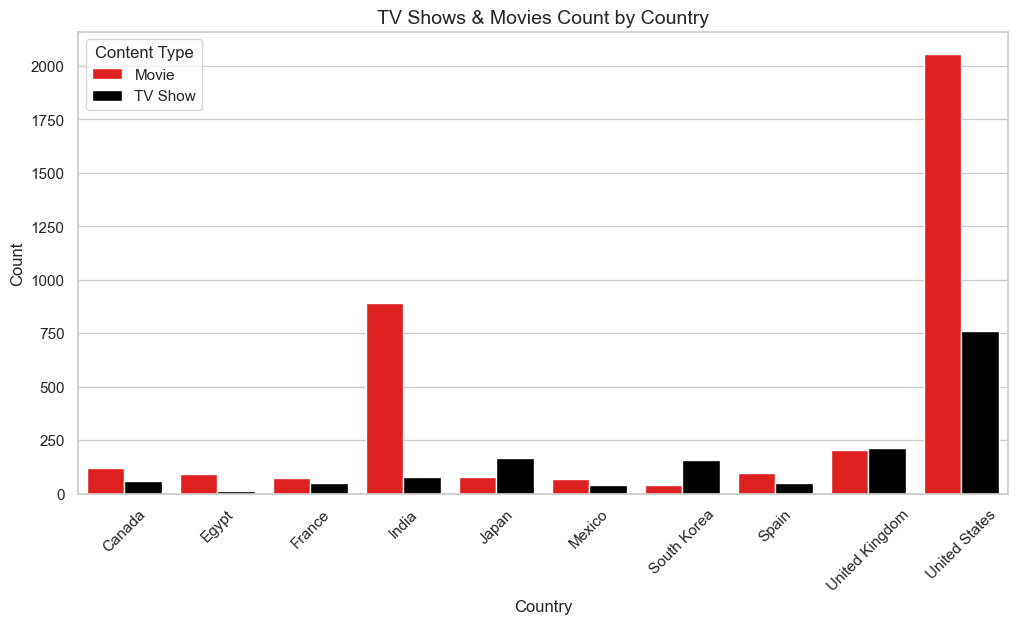

In [46]:
#Extract the Top 10 Countries
top_countries = data['country'].value_counts().head(10).index
top_country_data = data[data['country'].isin(top_countries)]

# Group Data by Country and Type
country_content_count = top_country_data.groupby(['country', 'type']).size().reset_index(name='count')

#Create the Grouped Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='type', data=country_content_count, palette=['red', 'black'])

plt.title("TV Shows & Movies Count by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()



# Box Plot for Release Year vs. Rating


C:\Users\HP\AppData\Local\Temp\ipykernel_23136\342767199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='release_year', data=data, palette="Reds")


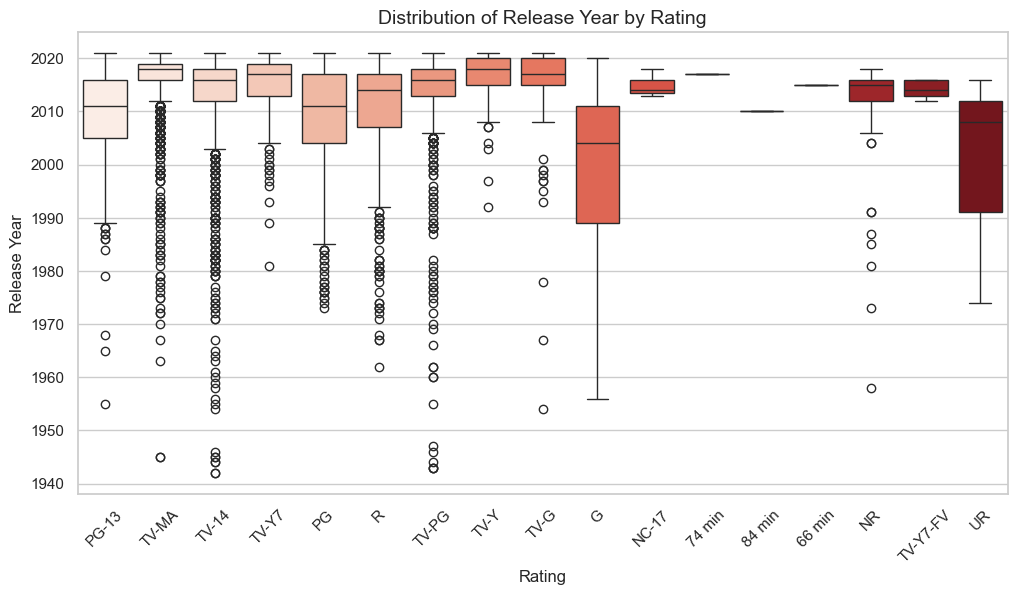

In [47]:
# Ensure release year is numeric
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

#create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='release_year', data=data, palette="Reds")

plt.title("Distribution of Release Year by Rating", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Release Year", fontsize=12)
plt.xticks(rotation=45)
plt.show()


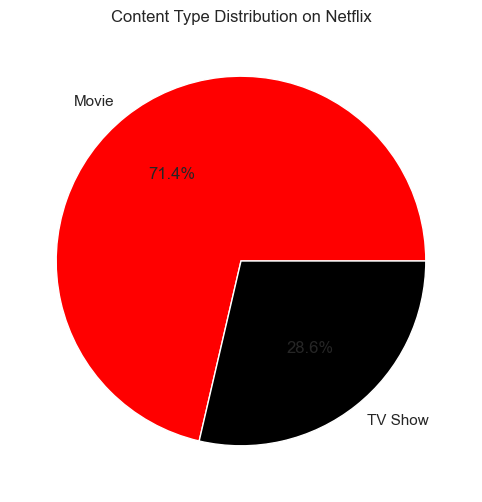

In [48]:
# Count Movies & TV Shows
content_counts = data['type'].value_counts()

# Create a Pie Chart
plt.figure(figsize=(8,6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=['red', 'black'])
plt.title('Content Type Distribution on Netflix')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_23136\3785560718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['rating'], order=data['rating'].value_counts().index, palette='Reds')


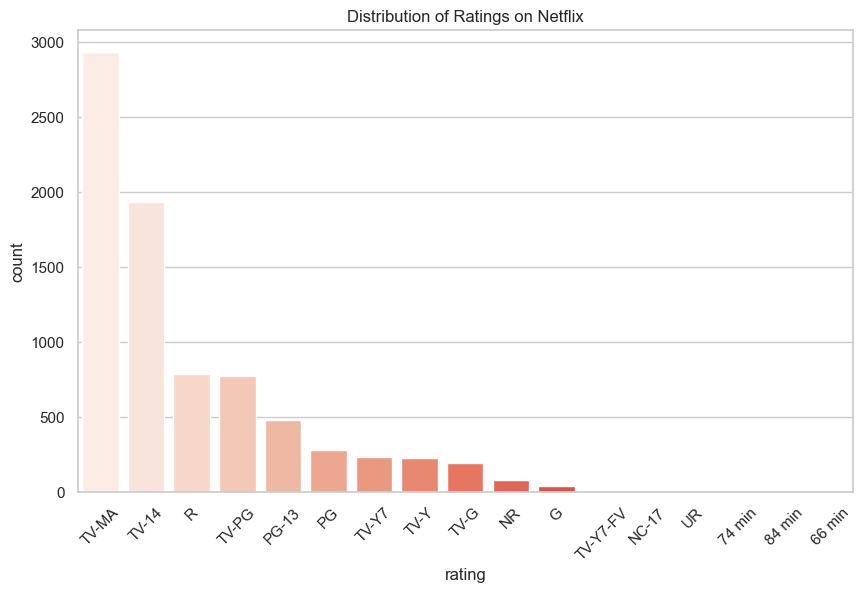

In [49]:
#Rating Distribution
plt.figure(figsize=(10,6))
sns.countplot(x=data['rating'], order=data['rating'].value_counts().index, palette='Reds')
plt.xticks(rotation=45)
plt.title('Distribution of Ratings on Netflix')
plt.show()
